### Importing libraries & reading dataset

In [86]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('/Users/tobiasgrassani/Documents/GitHub/Codehouse - DatasScience/Dataset/Listings.csv', encoding='ptcp154')

/Users/tobiasgrassani/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [88]:
# df = pd.read_csv('Listings.csv', encoding='ptcp154')

### Cleaning & Analyzing data

#### > <font color='LightSeaGreen'>Let's analyze it</font>

In [89]:
df.shape

(279712, 33)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

Conclusion: the columns 'district','host_response_time','host_response_rate','host_acceptance_rate' makes the job difficultier, so i decided to pop them.


#### > <font color='LightSeaGreen'>Now let's clean it</font>

##### Clean: Poping few useless columns

In [91]:
df.pop('district')
df.pop('host_response_time')
df.pop('host_response_rate')
df.pop('host_acceptance_rate')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
279707   NaN
279708   NaN
279709   NaN
279710   NaN
279711   NaN
Name: host_acceptance_rate, Length: 279712, dtype: float64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_is_superhost            279547 non-null  object 
 6   host_total_listings_count    279547 non-null  float64
 7   host_has_profile_pic         279547 non-null  object 
 8   host_identity_verified       279547 non-null  object 
 9   neighbourhood                279712 non-null  object 
 10  city                         279712 non-null  object 
 11  latitude                     279712 non-null  float64
 12  longitude                    279712 non-null  float64
 13 

Conclusion: After poping the columns, i proceed to clean NaN-value rows. 

##### Clean: Droping all NaN rows left & index reset

In [93]:
df = df.dropna()
df = df.reset_index(drop=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167686 entries, 0 to 167685
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   167686 non-null  int64  
 1   name                         167686 non-null  object 
 2   host_id                      167686 non-null  int64  
 3   host_since                   167686 non-null  object 
 4   host_location                167686 non-null  object 
 5   host_is_superhost            167686 non-null  object 
 6   host_total_listings_count    167686 non-null  float64
 7   host_has_profile_pic         167686 non-null  object 
 8   host_identity_verified       167686 non-null  object 
 9   neighbourhood                167686 non-null  object 
 10  city                         167686 non-null  object 
 11  latitude                     167686 non-null  float64
 12  longitude                    167686 non-null  float64
 13 

##### Results of cleaning

In [95]:
df.shape

(167686, 29)

In [96]:
list(df.columns)

['listing_id',
 'name',
 'host_id',
 'host_since',
 'host_location',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'city',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bedrooms',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable']

Now we have a clean dataset.

### Creating Masks

#### > <font color='LightSeaGreen'>New York</font>

In [97]:
df_NY = df['city'] == 'New York'
df_NY = df[df_NY]

#### > <font color='LightSeaGreen'>Paris</font>

In [98]:
df_PARIS = df['city'] == 'Paris'
df_PARIS = df[df_PARIS]

### Defining Variables

#### > <font color='LightSeaGreen'>New York</font>

In [99]:
prices_NY = df_NY['price']
overallRating_NY = df_NY['review_scores_rating']
accommodates_NY = df_NY['accommodates']
bedrooms_NY = df_NY['bedrooms']

In [100]:
prices_NY = df_NY['price']


#### > <font color='LightSeaGreen'>Paris</font>

In [101]:
prices_PARIS = df_PARIS['price']
overallRating_PARIS = df_PARIS['review_scores_rating']
accommodates_PARIS = df_PARIS['accommodates']
bedrooms_PARIS = df_PARIS['bedrooms']

### Exploring data

#### > <font color='LightSeaGreen'>Correlations</font>

In [102]:
df.corr()
corr = df.corr()

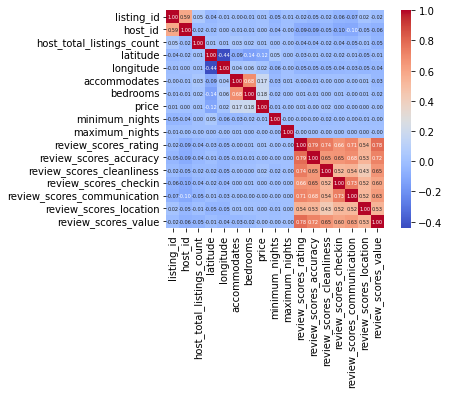

In [103]:
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 5},
           cmap= 'coolwarm')
plt.show()

Conclusion relevante: 
- ['acommodates'] & ['bedrooms'] are 0.68 correlative
- all of ['review_scores_...'] are above 0.5 of correlation

#### > <font color='LightSeaGreen'>Mean, Median & Mode</font>

In [104]:
df["city"].mode()

0    Paris
dtype: object

In [105]:
df_NY["price"].mean()

135.00841206696504

In [106]:
df_PARIS["price"].mean()

117.33904028279737

In [107]:
df_NY["bedrooms"].mean()

1.3087601524946129

In [108]:
df_PARIS["bedrooms"].mean()

1.3599862822170048

#### > <font color='LightSeaGreen'>New York Prices Mask: Applying Interquartil Ranges - IQR</font>

In [109]:
Q1 = np.percentile(prices_NY, 25, interpolation = 'midpoint')
Q3 = np.percentile(prices_NY, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
QD = IQR/2
print("New York Prices IQR: ",IQR)
print("Quartile Desviation: ",QD)

New York Prices IQR:  90.0
Quartile Desviation:  45.0


In [110]:
prices_NY = prices_NY[~((prices_NY<(Q1-1.5*IQR)) | (prices_NY>(Q3+1.5*IQR)))]
prices_NY.describe()

count    22569.000000
mean       104.042005
std         57.978680
min         10.000000
25%         59.000000
50%         90.000000
75%        140.000000
max        285.000000
Name: price, dtype: float64

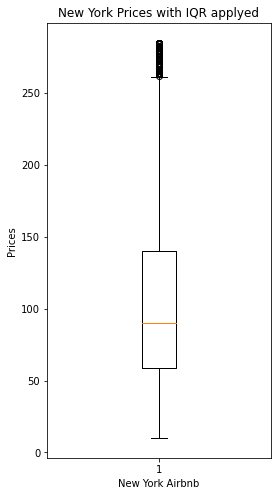

In [141]:
fig, ax = plt.subplots(figsize=(4,8))
ax.boxplot(prices_NY)
ax.set_title('New York Prices with IQR applyed')
ax.set_xlabel('New York Airbnb')
ax.set_ylabel('Prices')
plt.show()

#### > <font color='LightSeaGreen'>Paris Prices Mask: Applying Interquartil Ranges - IQR</font>

In [111]:
Q1 = np.percentile(prices_PARIS, 25, interpolation = 'midpoint')
Q3 = np.percentile(prices_PARIS, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
QD = IQR/2
print("Paris Prices IQR: ",IQR)
print("Quartile Desviation: ",QD)

Paris Prices IQR:  65.0
Quartile Desviation:  32.5


In [112]:
prices_PARIS = prices_PARIS[~((prices_PARIS<(Q1-1.5*IQR)) | (prices_PARIS>(Q3+1.5*IQR)))]
prices_PARIS.describe()

count    34929.000000
mean        90.878926
std         42.235559
min          8.000000
25%         60.000000
50%         81.000000
75%        112.000000
max        222.000000
Name: price, dtype: float64

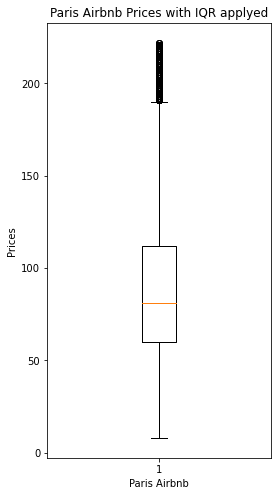

In [140]:
fig, ax = plt.subplots(figsize=(4,8))
ax.boxplot(prices_PARIS)
ax.set_title('Paris Airbnb Prices with IQR applyed')
ax.set_xlabel('Paris Airbnb')
ax.set_ylabel('Prices')
plt.show()

### Plotting

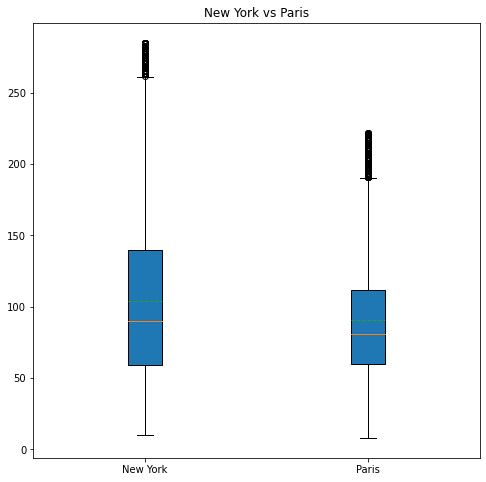

In [146]:
fix,ax = plt.subplots(figsize=(8,8))
columns = [prices_NY, prices_PARIS]
ax.boxplot(columns, patch_artist=True, meanline=True, showmeans=True)
ax.set_title('New York vs Paris')
plt.xticks([1,2],["New York","Paris"])
plt.show()

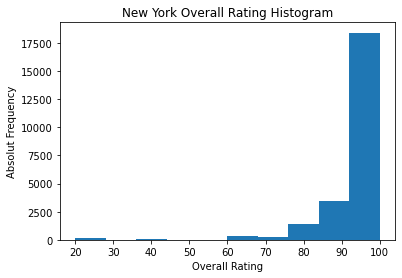

In [143]:
fix, ax = plt.subplots()
ax.hist(overallRating_NY,bins=10)
ax.set_title('New York Overall Rating Histogram')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Absolut Frequency')
plt.show()

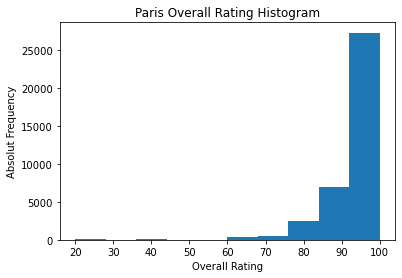

In [133]:
fix, ax = plt.subplots()
ax.hist(overallRating_PARIS,bins=10)
ax.set_title('Paris Overall Rating Histogram')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Absolut Frequency')
plt.show()

### Ignore: Code testing

<AxesSubplot:>

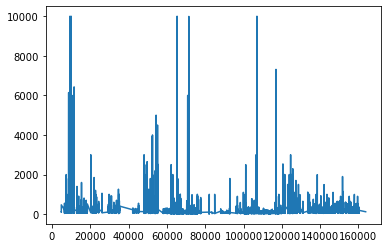

In [116]:
df_NY['price'].plot()

In [117]:
print(df_NY.groupby('bedrooms')['price'].mean().round(1))

bedrooms
1.0      106.1
2.0      200.0
3.0      268.4
4.0      429.2
5.0      587.0
6.0      865.0
7.0     1271.8
8.0      450.2
9.0      714.0
10.0     150.0
11.0      66.0
14.0    1661.0
21.0     201.0
Name: price, dtype: float64


In [118]:
print(df_NY.groupby('accommodates')['city'].count())

accommodates
1      3619
2     10894
3      2432
4      3851
5      1070
6      1301
7       252
8       344
9        47
10      137
11       27
12       65
13       20
14       15
15       10
16       48
Name: city, dtype: int64


In [119]:
print(df_PARIS.groupby('bedrooms')['price'].mean().round(1))

bedrooms
1.0       89.8
2.0      160.6
3.0      243.0
4.0      393.0
5.0      534.8
6.0     1039.4
7.0      666.7
9.0      460.0
12.0     999.0
23.0     120.0
50.0      49.0
Name: price, dtype: float64


In [120]:
print(df_PARIS.groupby('accommodates')['city'].count())

accommodates
1      1646
2     15906
3      3748
4     10868
5      1836
6      2606
7       362
8       553
9        66
10      147
11       29
12       62
13       17
14       23
15       17
16       21
Name: city, dtype: int64


In [121]:
df_NY['city'].count()

24132

In [122]:
df_PARIS['city'].count()

37907

In [123]:
df['city'].count()

167686

In [124]:
df_NY[['bedrooms','price']].describe().round()

,bedrooms,price
count,24132.0,24132.0
mean,1.0,135.0
std,1.0,252.0
min,1.0,10.0
25%,1.0,60.0
50%,1.0,96.0
75%,1.0,150.0
max,21.0,10000.0


In [125]:
prices_NY.describe()

count    22569.000000
mean       104.042005
std         57.978680
min         10.000000
25%         59.000000
50%         90.000000
75%        140.000000
max        285.000000
Name: price, dtype: float64